In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Загрузка и просмотр данных

In [2]:
df = pd.read_excel('credit_scoring.xlsx', index_col=15) 

In [3]:
df.head()

,customer_month_salary,sum_credit_current,term_credit_current,form,sphere,type,EDUCATION,age,marital_status,time_at_work,GENDER,month_passport_issued,month_with_bank,CITY,target
ID,,,,,,,,,,,,,,,
1,52350.25,500000,59,ООО,"Наука, Образование, Здравоохранение",вспомогательный персонал,высшее,44,холост / не замужем,68.0,мужской,124,67.0,Москва,1
2,115000.00,400000,60,Иная форма,Другое,специалист,высшее,30,холост / не замужем,96.0,мужской,107,68.0,Москва,1
3,87000.00,361000,60,ОАО,"Финансы, управляющие компании, банки, страхование",специалист,Высшее/Второе высшее/Ученая степень,28,женат / замужем,117.0,женский,2,72.0,Москва,1
4,145358.17,1499000,60,ЗАО,"Финансы, управляющие компании, банки, страхование",менеджер среднего звена,Высшее/Второе высшее/Ученая степень,30,женат / замужем,35.0,мужской,124,70.0,Москва,1
5,50000.00,365000,60,ООО,Другое,специалист,среднее-специальное,31,холост / не замужем,48.0,мужской,131,88.0,Москва,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4771 entries, 1 to 4771
Data columns (total 15 columns):
customer_month_salary    4730 non-null float64
sum_credit_current       4771 non-null int64
term_credit_current      4771 non-null int64
form                     4749 non-null object
sphere                   4752 non-null object
type                     4745 non-null object
EDUCATION                4754 non-null object
age                      4771 non-null int64
marital_status           4771 non-null object
time_at_work             4754 non-null float64
GENDER                   4771 non-null object
month_passport_issued    4771 non-null int64
month_with_bank          3732 non-null float64
CITY                     4767 non-null object
target                   4771 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 596.4+ KB


# Анализ целевого признака
Kоличество положительных и отрицательных примеров поля target сопоставимы

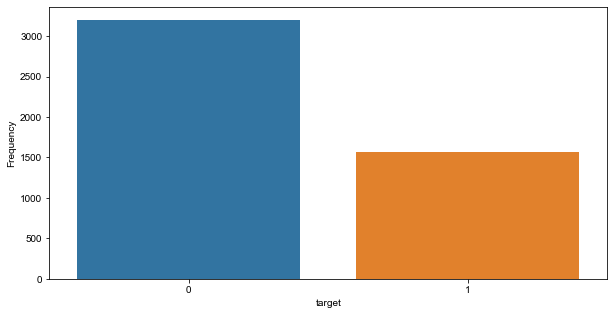

In [5]:
ax = sns.countplot(x = df.target)
sns.set(font_scale=1.5)
ax.set_xlabel('target')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

# Матрица корреляции признаков
Отсутствуют признаки, корреляция которых выше 0,6

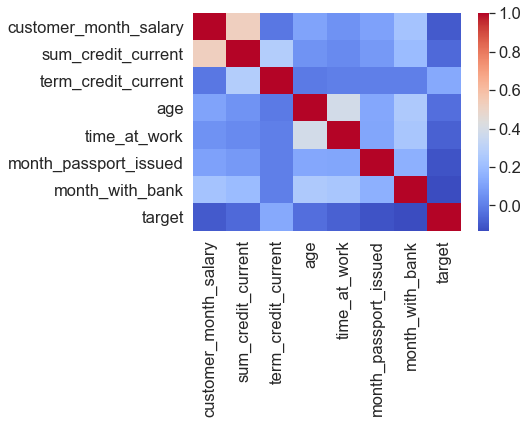

In [6]:
g = sns.heatmap(df.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

# Кодирование категориальных признаков
Заменим значения категориальных признаков, не несущие информации на Nan, т.к. в противном случае при one-hot кодировании данные значения будут вынесены в отдельный признак

In [7]:
categorical_columns = list(df.select_dtypes(include=[np.object]).columns)
categorical_columns

['form', 'sphere', 'type', 'EDUCATION', 'marital_status', 'GENDER', 'CITY']

## Обработка поля form

In [8]:
df.groupby('form').groups.keys()

dict_keys(['Государственное предприятие', 'ЗАО', 'Иная форма', 'Индивидуальный предприниматель', 'ОАО', 'ООО'])

In [9]:
df['form'] = df['form'].replace({'Иная форма': np.nan})

In [10]:
df = pd.get_dummies(df, columns=['form'])
df.head()

,customer_month_salary,sum_credit_current,term_credit_current,sphere,type,EDUCATION,age,marital_status,time_at_work,GENDER,month_passport_issued,month_with_bank,CITY,target,form_Государственное предприятие,form_ЗАО,form_Индивидуальный предприниматель,form_ОАО,form_ООО
ID,,,,,,,,,,,,,,,,,,,
1,52350.25,500000,59,"Наука, Образование, Здравоохранение",вспомогательный персонал,высшее,44,холост / не замужем,68.0,мужской,124,67.0,Москва,1,0,0,0,0,1
2,115000.00,400000,60,Другое,специалист,высшее,30,холост / не замужем,96.0,мужской,107,68.0,Москва,1,0,0,0,0,0
3,87000.00,361000,60,"Финансы, управляющие компании, банки, страхование",специалист,Высшее/Второе высшее/Ученая степень,28,женат / замужем,117.0,женский,2,72.0,Москва,1,0,0,0,1,0
4,145358.17,1499000,60,"Финансы, управляющие компании, банки, страхование",менеджер среднего звена,Высшее/Второе высшее/Ученая степень,30,женат / замужем,35.0,мужской,124,70.0,Москва,1,0,1,0,0,0
5,50000.00,365000,60,Другое,специалист,среднее-специальное,31,холост / не замужем,48.0,мужской,131,88.0,Москва,1,0,0,0,0,1


## Обработка поля sphere

In [11]:
df.groupby('sphere').groups.keys()

dict_keys(['Государственная служба, ВПК', 'Другое', 'Информационные технологии', 'Наука, Образование, Здравоохранение', 'Производство, добывающая промышленность', 'Сельское и лесное хозяйство', 'Строительство, Недвижимость', 'Торговля', 'Транспорт, Логистика', 'Туризм, Развлечения, Ресторанный бизнес', 'Финансы, управляющие компании, банки, страхование', 'Юридические услуги'])

In [12]:
df['sphere'] = df['sphere'].replace({'Другое': np.nan})

In [13]:
df = pd.get_dummies(df,columns=['sphere'])

## Обработка поля type

In [14]:
df.groupby('type').groups.keys()

dict_keys(['Собственное дело', 'вспомогательный персонал', 'другое', 'менеджер высшего звена', 'менеджер по продажам', 'менеджер среднего звена', 'рабочий', 'собственное дело', 'специалист', 'страховой агент', 'торговый представитель'])

In [15]:
df = df.replace({'другое': np.nan})
df = df.replace({'Собственное дело': 'собственное дело'})

In [16]:
df = pd.get_dummies(df,columns=['type'])

## Обработка поля EDUCATION

In [17]:
df.groupby('EDUCATION').groups.keys()

dict_keys(['*n.a.*', 'Высшее/Второе высшее/Ученая степень', 'Неполное среднее', 'второе высшее', 'высшее', 'незаконченное высшее', 'среднее', 'среднее-специальное', 'ученая степень'])

In [18]:
df['EDUCATION'] = df['EDUCATION'].replace({'*n.a.*': np.nan})

In [19]:
df = pd.get_dummies(df, columns=['EDUCATION'])

## Обработка поля marital_status

In [20]:
df.groupby('marital_status').groups.keys()

dict_keys(['вдовец / вдова', 'гражданский брак', 'женат / замужем', 'повторный брак', 'разведен / разведена', 'холост / не замужем'])

In [21]:
df = pd.get_dummies(df, columns=['marital_status'])

## Обработка поля GENDER

In [22]:
df.groupby('GENDER').groups.keys()

dict_keys(['женский', 'мужской'])

In [23]:
df = pd.get_dummies(df,columns=['GENDER'])

## Обработка поля CITY

In [24]:
df.groupby('CITY').groups.keys()

dict_keys(['Анапа', 'Ангарск', 'Балашиха', 'Барнаул', 'Белгород', 'Бердск', 'Братск', 'Брянск', 'Волгоград', 'Волжский', 'Воронеж', 'Екатеринбург', 'Железногорск', 'Златоуст', 'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Королев', 'Краснодар', 'Красноярск', 'Курск', 'Липецк', 'Магнитогорск', 'Миасс', 'Москва', 'Мытищи', 'Нефтеюганск', 'Нижний Новгород', 'Новороссийск', 'Новосибирск', 'Одинцово', 'Омск', 'Орел', 'Пермь', 'Петрозаводск', 'Подольск', 'Пятигорск', 'Ростов-на-Дону', 'Самара', 'Санкт-Петербург', 'Саранск', 'Саратов', 'Смоленск', 'Советск', 'Сочи', 'Ставрополь', 'Старый Оскол', 'Сургут', 'Таганрог', 'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Уфа', 'Челябинск', 'Череповец', 'Чита', 'Ярославль'])

In [25]:
df['CITY'].value_counts()

Москва             1088
Санкт-Петербург     449
Красноярск          190
Новосибирск         180
Челябинск           166
Краснодар           132
Нижний Новгород     129
Екатеринбург        122
Самара              107
Уфа                 103
Казань               91
Омск                 83
Пермь                79
Ростов-на-Дону       72
Сургут               69
Орел                 69
Липецк               65
Белгород             61
Волгоград            61
Саранск              58
Томск                56
Тюмень               56
Магнитогорск         52
Барнаул              51
Череповец            50
Ставрополь           49
Воронеж              48
Калуга               47
Тула                 46
Иркутск              45
                   ... 
Ярославль            41
Брянск               39
Киров                38
Подольск             38
Ижевск               37
Миасс                37
Пятигорск            36
Сочи                 32
Чита                 32
Кемерово             31
Старый Оскол    

In [26]:
round(df['CITY'][df['CITY']=='Нефтеюганск'].shape[0] / df['CITY'].shape[0],4) * 100

0.06

In [27]:
round(df['CITY'][df['CITY']=='Советск'].shape[0] / df['CITY'].shape[0],4) * 100

0.08

В наборе данных присутствуют города, встречающиеся менее 0.1% раз, заменим города на федеральные округи, опираясь на даныне из <a href="https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8">Википедии</a>

In [28]:
import requests
from bs4 import BeautifulSoup

def get_html(url):
    response = requests.get(url)
    return response.text


url = "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
html = get_html(url)

soup = BeautifulSoup(html, 'html.parser')
right_table = soup.find("table", {"class": "standard sortable"})

city_dict = {}
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) > 0:
        if cells[2].text.strip() == 'Москва':
            city_dict[cells[2].text.strip()] = 'Москва'
        elif cells[2].text.strip() == 'Санкт-Петербург':
            city_dict[cells[2].text.strip()] = 'Санкт-Петербург'
        elif cells[3].text.strip() == 'Московская область':
            city_dict[cells[2].text.strip()] = 'Московская область'
        elif cells[3].text.strip() == 'Ленинградская область':
            city_dict[cells[2].text.strip()] = 'Ленинградская область'
        else:
            city_dict[cells[2].text.strip()] = cells[4].text.strip()

In [29]:
df['federal_district'] = df['CITY'].map(city_dict)

In [30]:
df = pd.get_dummies(df, columns=['federal_district'])

In [31]:
df = pd.get_dummies(df, columns=['CITY'])

# Количественные признаки

## Пропущенные значения
Процент пропусков значений не более 22, заменим пропущенные значения на медиану столбца

In [32]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [33]:
missing_values_table(df)

Your selected dataframe has 122 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
month_with_bank,1039,21.8
customer_month_salary,41,0.9
time_at_work,17,0.4


## Обработка поля time_at_work

In [34]:
df.time_at_work.describe()

count    4754.000000
mean       60.999159
std        64.448633
min         0.000000
25%        15.000000
50%        39.000000
75%        82.000000
max       478.000000
Name: time_at_work, dtype: float64

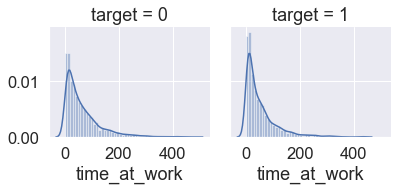

In [35]:
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "time_at_work")

In [36]:
df.groupby('time_at_work').groups.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 

In [37]:
median = df.time_at_work.median(axis=0)
df.time_at_work = df.time_at_work.replace({0.0: median})
median

39.0

## Обработка поля customer_month_salary

In [38]:
df.customer_month_salary.describe()

count    4.730000e+03
mean     5.779673e+04
std      6.308617e+04
min      0.000000e+00
25%      2.800000e+04
50%      4.137263e+04
75%      6.500000e+04
max      1.357620e+06
Name: customer_month_salary, dtype: float64

In [39]:
df.groupby('customer_month_salary').groups.keys()

dict_keys([0.0, 3366.86, 6692.04, 7471.56, 8571.72, 9004.5, 9321.18, 9440.68, 9446.44, 9503.54, 9527.37, 9585.15, 9704.85, 9707.79, 10025.01, 10087.67, 10120.92, 10220.76, 10245.08, 10405.97, 10440.0, 10555.65, 10556.42, 10605.300000000001, 10625.22, 10705.35, 10759.550000000001, 10865.43, 10911.41, 10964.61, 10969.92, 10979.4, 11354.1, 11463.12, 11520.08, 11571.81, 11713.59, 11775.37, 11779.800000000001, 11807.64, 11838.09, 11972.41, 12000.0, 12007.48, 12097.35, 12110.4, 12161.73, 12176.94, 12209.58, 12325.87, 12345.050000000001, 12355.5, 12380.69, 12429.68, 12470.08, 12599.45, 12715.050000000001, 12735.06, 12787.26, 12834.24, 12883.73, 12908.94, 13050.0, 13270.98, 13299.36, 13350.15, 13407.57, 13476.300000000001, 13478.24, 13490.15, 13504.14, 13516.59, 13561.56, 13612.630000000001, 13684.23, 13706.85, 13731.85, 13840.710000000001, 13850.7, 13894.77, 13899.99, 14000.0, 14010.48, 14012.75, 14089.95, 14180.5, 14220.66, 14405.460000000001, 14431.69, 14455.050000000001, 14502.03, 14534.22

In [40]:
median = df.customer_month_salary.median(axis=0)
df.customer_month_salary = df.customer_month_salary.replace({0.0: median})
median

41372.630000000005

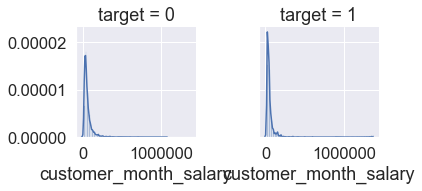

In [41]:
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "customer_month_salary")

In [42]:
df.customer_month_salary = pd.qcut(df.customer_month_salary.values, 6).codes

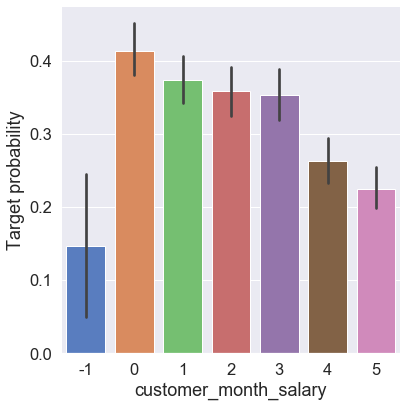

In [43]:
g  = sns.factorplot(x="customer_month_salary",y="target",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Обработка поля month_with_bank

In [44]:
df.month_with_bank.describe()

count    3732.000000
mean       43.957663
std        34.134775
min        -1.000000
25%        17.000000
50%        36.000000
75%        62.000000
max       200.000000
Name: month_with_bank, dtype: float64

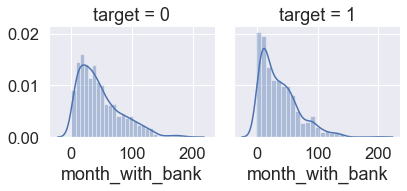

In [45]:
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "month_with_bank")

In [46]:
df.groupby('month_with_bank').groups.keys()

dict_keys([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 142.0, 143.0, 145.0, 148.0, 150.0, 152.0, 155.0, 156.0, 159.0, 160.0, 163.0, 164.0, 166.0, 167.0, 170.0, 1

In [47]:
median = df.month_with_bank.median(axis=0)
df.month_with_bank = df.month_with_bank.replace({0.0: median})
df.month_with_bank = df.month_with_bank.replace({-1.0: median})
median

36.0

In [48]:
df.month_with_bank = pd.qcut(df.month_with_bank.values, 5,duplicates = 'drop').codes

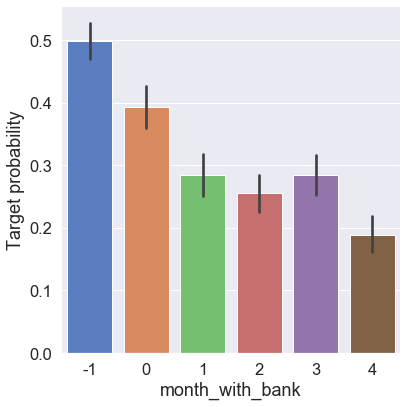

In [49]:
g  = sns.factorplot(x="month_with_bank",y="target",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Обработка поля age

In [50]:
df.age.describe()

count    4771.000000
mean       36.961643
std         9.373140
min        22.000000
25%        29.000000
50%        35.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

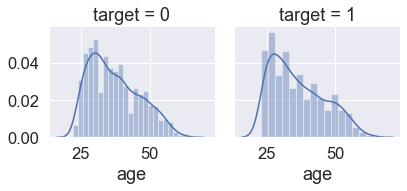

In [51]:
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "age")

In [52]:
df.groupby('age').groups.keys()

dict_keys([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [53]:
df.age = pd.qcut(df.age.values, 5).codes

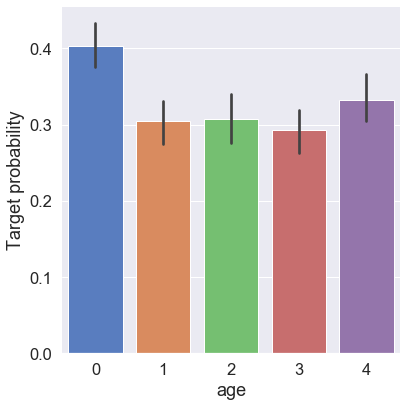

In [54]:
g  = sns.factorplot(x="age",y="target",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Обработка поля month_passport_issued

In [55]:
df.month_passport_issued.describe()

count    4771.000000
mean       92.163488
std        48.746911
min         0.000000
25%        52.000000
50%        93.000000
75%       134.000000
max       230.000000
Name: month_passport_issued, dtype: float64

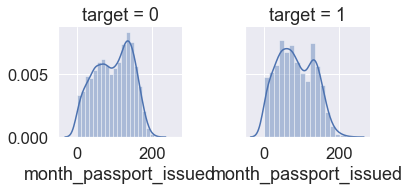

In [56]:
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "month_passport_issued")

In [57]:
df.groupby('month_passport_issued').groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195, 196, 198, 199, 201, 202, 203, 204, 205, 206, 212, 213, 230])

In [58]:
df.month_passport_issued = pd.qcut(df.month_passport_issued.values, 5,duplicates = 'drop').codes

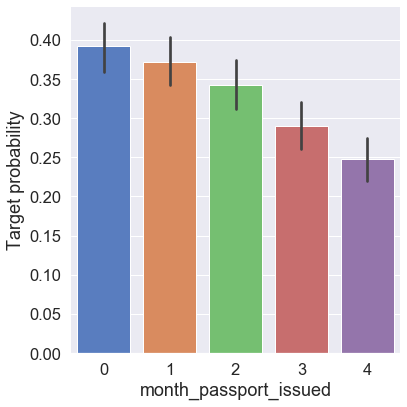

In [59]:
g  = sns.factorplot(x="month_passport_issued",y="target",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Обработка поля sum_credit_current	

In [60]:
df.sum_credit_current.describe()

count    4.771000e+03
mean     3.396049e+05
std      3.001721e+05
min      3.000000e+04
25%      1.510000e+05
50%      2.740000e+05
75%      4.400000e+05
max      8.000000e+06
Name: sum_credit_current, dtype: float64

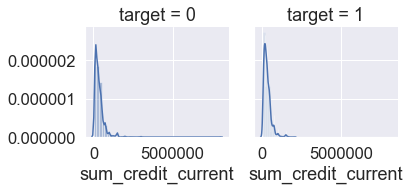

In [61]:
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "sum_credit_current")

In [62]:
df.groupby('sum_credit_current').groups.keys()

dict_keys([30000, 36000, 38000, 42000, 44000, 50000, 51000, 53000, 55000, 57000, 58000, 59000, 60000, 61000, 63000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 75000, 77000, 78000, 80000, 81000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 92500, 93000, 94000, 95000, 95500, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 105500, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 115500, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 135500, 136000, 137000, 138000, 139000, 139500, 140000, 141000, 142000, 143000, 144000, 145000, 146000, 148000, 149000, 150000, 150500, 151000, 152000, 153000, 154000, 155000, 156000, 157000, 158000, 158500, 159000, 160000, 161000, 162000, 163000, 164000, 165000, 166000, 167000, 167500, 168000, 169000, 170000, 171000, 172000, 173000, 174000, 175000, 176000, 177000, 178

## Обработка поля term_credit_current

In [63]:
df.term_credit_current.describe()

count    4771.000000
mean       48.706141
std        16.167960
min        12.000000
25%        36.000000
50%        60.000000
75%        60.000000
max        84.000000
Name: term_credit_current, dtype: float64

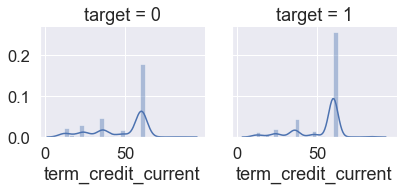

In [64]:
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "term_credit_current")

In [65]:
df.groupby('term_credit_current').groups.keys()

dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 72, 79, 84])

# Подготовка обучающей, тестовой и валидационной выборок

In [66]:
X = df.drop('target', axis=1)
y = df.target

In [67]:
X_validation, X_rest, y_validation, y_rest = train_test_split(X, y, test_size=0.9, random_state=0)

In [68]:
 X_test, X_train, y_test,y_train = train_test_split(X_rest,y_rest, test_size=0.9, random_state=0)

In [69]:
X_test.shape

(429, 121)

In [70]:
X_train.shape

(3865, 121)

# Обучение модели
Обучение алгоритма градиентного бустинга, реализация Catboost

In [71]:
categorical_features_indices = np.where(X.dtypes == np.object)[0]

In [72]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

In [73]:
model1 = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent', 
)

In [74]:
model1.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [75]:
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
eval_metrics = model1.eval_metrics(validate_pool, ['AUC'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [76]:
model1.score(X_validation, y_validation)

0.7337526205450734

# Ценность признаков

In [77]:
feature_importances = model1.get_feature_importance(train_pool)
feature_names = X_train.columns
nm = []
for score, name in sorted(zip(feature_importances, feature_names), reverse=True)[:15]:
    print('{}: {}'.format(name, score))

month_with_bank: 11.328731261416953
term_credit_current: 9.766444844136716
time_at_work: 7.666899324747423
month_passport_issued: 6.9414109210407675
customer_month_salary: 6.705446318020636
sum_credit_current: 6.229818758825241
age: 5.806216127513624
GENDER_женский: 2.7578010209871273
EDUCATION_высшее: 2.7296687840869684
GENDER_мужской: 2.6462974326974216
type_специалист: 2.6397059036026045
type_рабочий: 2.327155885820121
EDUCATION_среднее: 1.9191318991886235
marital_status_женат / замужем: 1.7307002864236485
federal_district_Москва: 1.6909714909614988


In [78]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = feature_importances
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

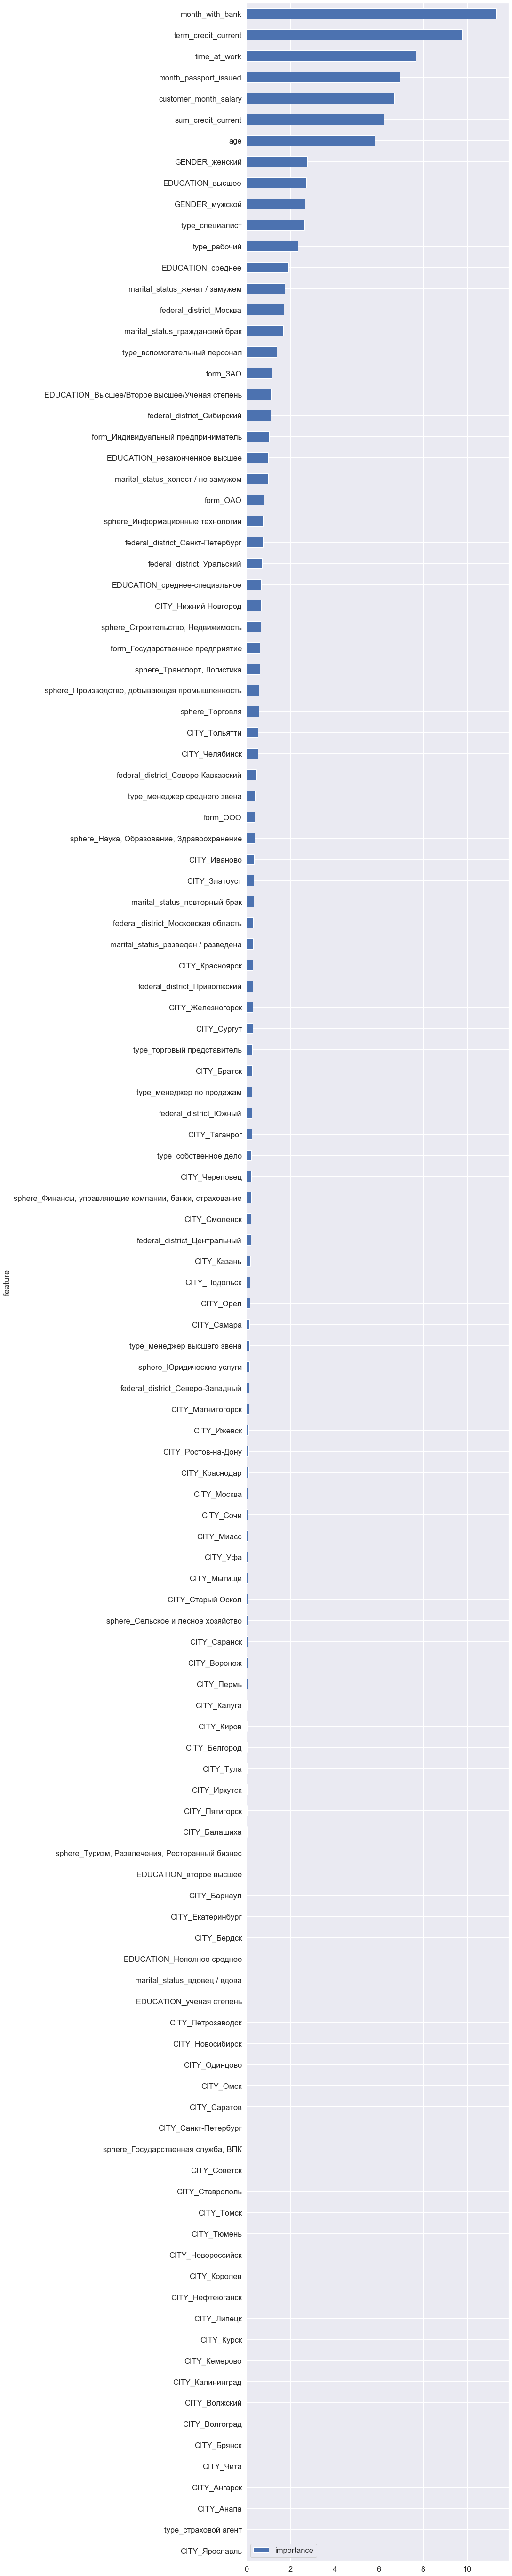

In [79]:
features.plot(kind='barh', figsize=(10, 100))